In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
df_fashion = pd.read_csv('./data/naver_shopping_fashion.csv', index_col=0)
df_digital = pd.read_csv('./data/naver_shopping_digital.csv', index_col=0)

In [3]:
df = pd.concat([df_fashion, df_digital], ignore_index=True)


df.to_csv('./data/naver_shopping.csv')

In [4]:
df = df.sample(frac=1).reset_index(drop=True)

In [5]:
df.head(5)

,title,image,lprice,link,category1,category2,category3,category4
0,신지모루 갤럭시Z플립5 전면 강화유리 내부 후면 액정보호필름 2매,https://shopping-phinf.pstatic.net/main_426487...,13400,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,휴대폰보호필름,액정보호필름
1,빅쏘 갤럭시S24 울트라 강화유리 필름 2.5CX플러스,https://shopping-phinf.pstatic.net/main_451489...,10900,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,휴대폰보호필름,액정보호필름
2,삼성전자 갤럭시탭 S9 FE 플러스 WIFI 256GB,https://shopping-phinf.pstatic.net/main_450330...,768000,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,태블릿PC,NaN,NaN
3,EFM네트웍스 아이피타임 A2004SE,https://shopping-phinf.pstatic.net/main_344060...,43170,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,네트워크장비,공유기,유무선공유기
4,아이엠듀 갤럭시S21용 풀커버 강화유리 액정보호필름 2매,https://shopping-phinf.pstatic.net/main_299382...,6900,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,휴대폰보호필름,액정보호필름


In [6]:
df.describe()

,lprice
count,2.000000e+03
mean,1.673764e+05
std,3.331754e+05
min,1.700000e+02
25%,2.240000e+04
50%,5.900000e+04
75%,1.462332e+05
max,3.190000e+06


In [7]:
df = df.drop(columns=['image', 'link', 'category3', 'category4'], errors='ignore')
df.head()

,title,lprice,category1,category2
0,신지모루 갤럭시Z플립5 전면 강화유리 내부 후면 액정보호필름 2매,13400,디지털/가전,휴대폰액세서리
1,빅쏘 갤럭시S24 울트라 강화유리 필름 2.5CX플러스,10900,디지털/가전,휴대폰액세서리
2,삼성전자 갤럭시탭 S9 FE 플러스 WIFI 256GB,768000,디지털/가전,태블릿PC
3,EFM네트웍스 아이피타임 A2004SE,43170,디지털/가전,네트워크장비
4,아이엠듀 갤럭시S21용 풀커버 강화유리 액정보호필름 2매,6900,디지털/가전,휴대폰액세서리


패션의류 카테고리가 아닌 것이 있는지 검증

In [8]:
len(df[df['category1'] != '패션의류'])

1000

카테고리2 별로 가격 평균값 비교

In [9]:
import matplotlib.font_manager as fm

In [10]:
# for key in plt.rcParamsDefault.keys():
#     if 'font' in key:
#         print("{}: {}".format(key, plt.rcParamsDefault[key]))

plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

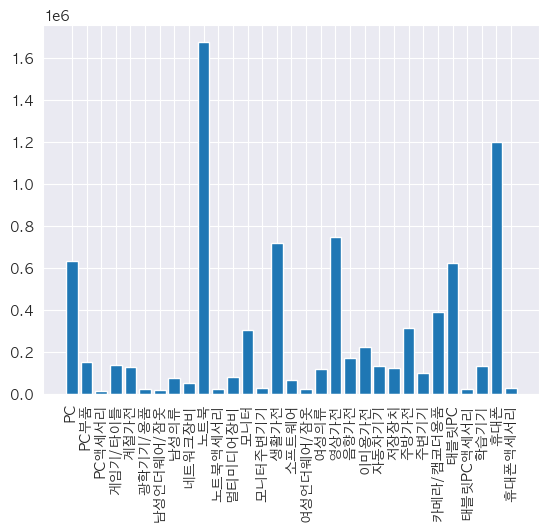

In [11]:
groupby_ = df.groupby('category2')['lprice'].mean()
plt.bar(groupby_.keys(), groupby_.tolist())
plt.xticks(rotation=90)
plt.show()

카테고리2 별로 아이템 수 비교

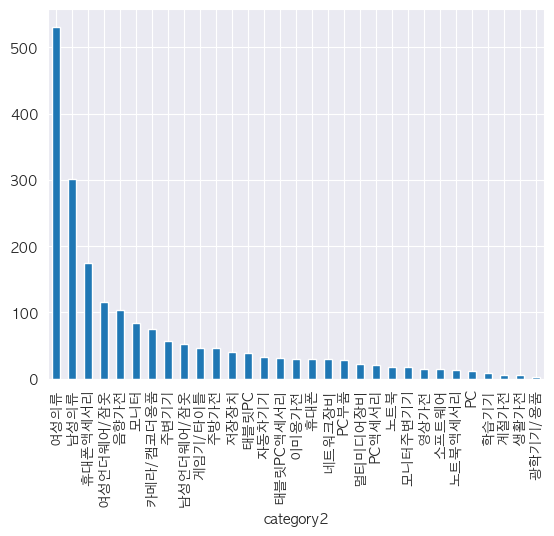

In [12]:
category2_values = df['category2'].value_counts().sort_values(ascending=False).index.tolist()
df['category2'].value_counts().sort_values(ascending=False).plot(
    kind="bar",
    xticks=range(len(category2_values)),
    rot=90
)
plt.xticks(range(len(category2_values)), category2_values);
plt.show();

name : SenetencePiece || CountVectorizer || TF-IDF <br>
category : OneHotEncoder 로 featrue engineering

In [13]:
df

,title,lprice,category1,category2
0,신지모루 갤럭시Z플립5 전면 강화유리 내부 후면 액정보호필름 2매,13400,디지털/가전,휴대폰액세서리
1,빅쏘 갤럭시S24 울트라 강화유리 필름 2.5CX플러스,10900,디지털/가전,휴대폰액세서리
2,삼성전자 갤럭시탭 S9 FE 플러스 WIFI 256GB,768000,디지털/가전,태블릿PC
3,EFM네트웍스 아이피타임 A2004SE,43170,디지털/가전,네트워크장비
4,아이엠듀 갤럭시S21용 풀커버 강화유리 액정보호필름 2매,6900,디지털/가전,휴대폰액세서리
...,...,...,...,...
1995,남자 내복 유니클로 히트텍 대체 기능성 발열 방한 남성 심리스 하의 바지 기모 내의...,12500,패션의류,남성언더웨어/잠옷
1996,QCY T13X,15960,디지털/가전,음향가전
1997,한글과컴퓨터 한컴오피스 2024 가정용,94890,디지털/가전,소프트웨어
1998,지오지아 FW 테이퍼드핏 체크 슬랙스 NV ABC4PP1101 P002900122,15480,패션의류,남성의류


In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('./data/naver_shopping.csv')

In [16]:
with open('./data/title.txt', 'w', encoding='utf-8') as f:
    for col in ['title', 'category1', 'category2']:
        for line in df[col].values:
            try:
                f.write(line+'\n')
                print('s')
            except TypeError as e:
                print(line, e)

s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s
s


In [17]:
with open('./data/title.txt', 'r', encoding='utf-8') as f:
    titles =f.read().split('\n')
print(titles[0])

탑텐 TOPTEN 공용 플란넬 라운지웨어 SET-UP MSC4UI3001


# Category

## One Hot
단어간의 유사도 표현 못함 -> 폐기

In [18]:
from sklearn.preprocessing import OneHotEncoder

In [19]:
class oneHotEncoder():
    def __init__(self):
        self.encoder = OneHotEncoder(sparse=False)
        
    def fit_transform(self, data: list):
        return self.encoder.fit_transform(data)
        
    def forward(self, df: pd.DataFrame):
        category2_encoded = self.encoder.fit_transform(df[["category2"]])
        df = pd.concat([df, 
                        pd.DataFrame(category2_encoded, columns=["OneHot_Category2_"+ str(self.encoder.categories_[0][i]) 
                                                     for i in range (len(self.encoder.categories_[0]))])], axis =1)
        return df

In [20]:
ohEncoder = oneHotEncoder()

df_ = ohEncoder.forward(df)
df_

,Unnamed: 0,title,image,lprice,link,category1,category2,category3,category4,OneHot_Category2_PC,...,OneHot_Category2_자동차기기,OneHot_Category2_저장장치,OneHot_Category2_주방가전,OneHot_Category2_주변기기,OneHot_Category2_카메라/캠코더용품,OneHot_Category2_태블릿PC,OneHot_Category2_태블릿PC액세서리,OneHot_Category2_학습기기,OneHot_Category2_휴대폰,OneHot_Category2_휴대폰액세서리
0,0,탑텐 TOPTEN 공용 플란넬 라운지웨어 SET-UP MSC4UI3001,https://shopping-phinf.pstatic.net/main_422745...,18280,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,남성언더웨어/잠옷,잠옷/홈웨어,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,LE TROIS 23F W 이보영의 르투아 리얼 폭스퍼 롱구스다운,https://shopping-phinf.pstatic.net/main_448236...,28300,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,점퍼,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,겨울 여자슬랙스 기모 밴딩슬랙스 일자 키작녀바지,https://shopping-phinf.pstatic.net/main_447941...,32900,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,바지,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,올리브데올리브 폭스퍼 후드 다운 롱 패딩 YP3WH830,https://shopping-phinf.pstatic.net/main_431482...,108270,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,점퍼,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,어니우니 20수 무지 반팔 티셔츠 기본 라운드 면티,https://shopping-phinf.pstatic.net/main_326721...,8400,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,남성의류,티셔츠,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,스마트카라 PCS-400,https://shopping-phinf.pstatic.net/main_230355...,563430,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,주방가전,음식물처리기,NaN,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,1996,신지모루 갤럭시 워치 스타일 컬러 실리콘 밴드 스트랩,https://shopping-phinf.pstatic.net/main_297904...,9400,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,웨어러블 디바이스 액세서리,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1997,1997,닌텐도 스위치 OLED 스플래툰3 에디션,https://shopping-phinf.pstatic.net/main_355800...,382500,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,게임기/타이틀,휴대용게임기,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,1998,엠지텍 아이언V65 Pro,https://shopping-phinf.pstatic.net/main_273307...,138700,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,음향가전,블루투스셋,블루투스이어폰/이어셋,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Name

## 전처리 - Tokenizer
<uo> 
    <li> SentencePieceTokenizer </li>
    <li> BertWordPieceTokenizer </li>
</uo>

In [21]:
import os
from tokenizers import Tokenizer, SentencePieceBPETokenizer, BertWordPieceTokenizer
from transformers import BertTokenizer

In [22]:
class sentencePieceTokenizer():
    def __init__(self, DIR: str):
        try:
            self.tokenizer = Tokenizer.from_file(DIR + 'SentencePieceBPETokenizer/' + 'tokenizer.json')
        except:
            self.tokenizer = SentencePieceBPETokenizer()
    
    def train(self, file: str):
        self.tokenizer.train(file, vocab_size=25000)
        
    def forward(self, data: str) -> list:
        return self.tokenizer.encode(data)
    
    def save_model(self, DIR: str) -> None:
        PATH = DIR + 'SentencePieceBPETokenizer/'
        if not os.path.exists(PATH):
            os.makedirs(PATH)
        self.tokenizer.save(PATH+'tokenizer.json')

### Default

In [23]:
sentence_file = './data/title.txt'
DIR = './model/'

### SentencePiece Tokenizer

In [24]:
spTokenizer = sentencePieceTokenizer(DIR)

In [25]:
if not os.path.exists(DIR + 'SentencePieceBPETokenizer/' + 'tokenizer.json'):
    spTokenizer.train(sentence_file)
    spTokenizer.save_model(DIR)

In [26]:
for t in df.title.values[:10]:
    print(spTokenizer.forward(t).tokens)

['▁탑텐', '▁TOPTEN', '▁공용', '▁플란넬', '▁라운지웨어', '▁SET-UP', '▁MSC4UI', '300', '1']
['▁LE', '▁TROIS', '▁23', 'F', '▁W', '▁이', '보', '영', '의', '▁르투아', '▁리얼', '▁폭스퍼', '▁롱', '구스다운']
['▁겨울', '▁여자슬랙스', '▁기모', '▁밴딩슬랙스', '▁일자', '▁키작녀', '바지']
['▁올리브데올리브', '▁폭스퍼', '▁후드', '▁다운', '▁롱', '▁패딩', '▁YP3WH', '8', '30']
['▁어니우니', '▁20', '수', '▁무지', '▁반팔', '▁티셔츠', '▁기본', '▁라운드', '▁면티']
['▁리바이스', '▁남성', '▁568', '▁스테이', '▁루즈', '▁핏', '▁카펜터', '▁워크퀘어', '▁진', '▁55849-00', '33']
['▁판도라by비비안', '▁여성', '▁팬티', '▁햄라인', '▁심리스', '▁누디', '▁면', '▁모달', '▁햄팬티', '세트']
['▁폭스클럽', '▁잠옷', '▁빅사이즈', '▁피치기모', '▁수면', '▁가족', '잠옷', '▁가을', '▁겨울잠옷', '▁커플', '▁파자마']
['▁스투시', '▁백', '로', '고', '▁기모', '▁후드티', '▁P33', '5', '14', '22', '90']
['▁폴햄', '▁여성', '▁보아', '퍼', '▁롱', '▁패딩', '▁PHD4JP24', '69', 'L', 'KH']


In [27]:
df['title_sentencePiece'] = df['title'].apply(lambda x : spTokenizer.forward(x).tokens).apply(lambda x : " ".join(x))

In [28]:
df

,Unnamed: 0,title,image,lprice,link,category1,category2,category3,category4,title_sentencePiece
0,0,탑텐 TOPTEN 공용 플란넬 라운지웨어 SET-UP MSC4UI3001,https://shopping-phinf.pstatic.net/main_422745...,18280,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,남성언더웨어/잠옷,잠옷/홈웨어,NaN,▁탑텐 ▁TOPTEN ▁공용 ▁플란넬 ▁라운지웨어 ▁SET-UP ▁MSC4UI 300 1
1,1,LE TROIS 23F W 이보영의 르투아 리얼 폭스퍼 롱구스다운,https://shopping-phinf.pstatic.net/main_448236...,28300,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,점퍼,NaN,▁LE ▁TROIS ▁23 F ▁W ▁이 보 영 의 ▁르투아 ▁리얼 ▁폭스퍼 ▁롱 ...
2,2,겨울 여자슬랙스 기모 밴딩슬랙스 일자 키작녀바지,https://shopping-phinf.pstatic.net/main_447941...,32900,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,바지,NaN,▁겨울 ▁여자슬랙스 ▁기모 ▁밴딩슬랙스 ▁일자 ▁키작녀 바지
3,3,올리브데올리브 폭스퍼 후드 다운 롱 패딩 YP3WH830,https://shopping-phinf.pstatic.net/main_431482...,108270,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,여성의류,점퍼,NaN,▁올리브데올리브 ▁폭스퍼 ▁후드 ▁다운 ▁롱 ▁패딩 ▁YP3WH 8 30
4,4,어니우니 20수 무지 반팔 티셔츠 기본 라운드 면티,https://shopping-phinf.pstatic.net/main_326721...,8400,https://search.shopping.naver.com/gate.nhn?id=...,패션의류,남성의류,티셔츠,NaN,▁어니우니 ▁20 수 ▁무지 ▁반팔 ▁티셔츠 ▁기본 ▁라운드 ▁면티
...,...,...,...,...,...,...,...,...,...,...
1995,1995,스마트카라 PCS-400,https://shopping-phinf.pstatic.net/main_230355...,563430,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,주방가전,음식물처리기,NaN,▁스마트 카라 ▁PC S- 400
1996,1996,신지모루 갤럭시 워치 스타일 컬러 실리콘 밴드 스트랩,https://shopping-phinf.pstatic.net/main_297904...,9400,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,휴대폰액세서리,웨어러블 디바이스 액세서리,NaN,▁신지모루 ▁갤럭시 ▁워치 ▁ ▁스타일 ▁컬러 ▁실리콘 ▁밴드 ▁스트랩
1997,1997,닌텐도 스위치 OLED 스플래툰3 에디션,https://shopping-phinf.pstatic.net/main_355800...,382500,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,게임기/타이틀,휴대용게임기,NaN,▁닌텐도 ▁스위치 ▁OLED ▁스플래툰3 ▁에디션
1998,1998,엠지텍 아이언V65 Pro,https://shopping-phinf.pstatic.net/main_273307...,138700,https://search.shopping.naver.com/gate.nhn?id=...,디지털/가전,음향가전,블루투스셋,블루투스이어폰/이어셋,▁엠지텍 ▁아이 언 V 65 ▁Pro


###  BertWordPieceTokenizer

In [29]:
from tokenizers import Tokenizer, SentencePieceTokenizer, BertWordPieceTokenizer

ImportError: cannot import name 'SentencePieceTokenizer' from 'tokenizers' (/Users/sella_mac/opt/anaconda3/envs/pytorch_3_8_11/lib/python3.8/site-packages/tokenizers/__init__.py)

In [ ]:
class bertWordPieceTokenizer():
    def __init__(self):
        try:
            self.tokenizer = Tokenizer.from_file(DIR + 'bertWordPieceTokenizer/' + 'tokenizer.json')
        except:
            # lowercase : 대소문자를 구분 여부. True일 경우 구분하지 않음.
            # strip_accents : True일 경우 악센트 제거. ex) é → e, ô → o
            self.tokenizer = BertWordPieceTokenizer(lowercase=False, strip_accents=False)
        
    def train(self, file: str) -> list:
        self.tokenizer.train(file, vocab_size=25000)
        
    def forward(self, data: str) -> list:
        return self.tokenizer.encode(data)
    
    def save_model(self, DIR: str) -> None:
        PATH = DIR + 'BertWordPieceTokenizer/'
        if not os.path.exists(PATH):
            os.makedirs(PATH)
        self.tokenizer.save(PATH+'tokenizer.json')

In [ ]:
bwpTokenizer = bertWordPieceTokenizer()
if not os.path.exists(DIR + 'BertWordPieceTokenizer/' + 'tokenizer.json'):
    bwpTokenizer.train(sentence_file)
    bwpTokenizer.save_model(DIR)

In [ ]:
for t in df.title.values[:10]:
    print(bwpTokenizer.forward(t).tokens)

In [ ]:
df['title_bertWP'] = df['title'].apply(lambda x : bwpTokenizer.forward(x).tokens).apply(lambda x : " ".join(x))

In [ ]:
df.info()

## Vectorize
<uo><li>CountVectorizer</li>
    <li>TF-IDF</li>
</uo>

In [ ]:
# df.to_csv('./data/preprocessed.csv')

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
df = pd.read_csv('./data/preprocessed.csv')
vectorizer = CountVectorizer(ngram_range=(1, 3))

# document_vec = vectorizer.fit(df['title']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.fit_transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.fit_transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.fit_transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.fit_transform(df['category1']).toarray()
category2_vec = vectorizer.fit_transform(df['category2']).toarray()



print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)
    
combined_vectors = []

In [ ]:
document_vec = vectorizer.fit_transform(df['title']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.transform(df['category1']).toarray()
category2_vec = vectorizer.transform(df['category2']).toarray()


print(document_vec.shape)
print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)
    
combined_vectors = []

In [ ]:
cos_sim_cnt = cosine_similarity(document_vec, document_vec)
candidates_cnt = cos_sim_cnt.argsort()[:, ::-1][:, 1:11].tolist()

In [ ]:
text_columns = ['title', 'category2', 'title_sentencePiece', 'title_bertWP']

cosine_dict_cnt = {}

for col in text_columns:
    cntVectorize = CountVectorizer(ngram_range=(1, 3))
    cnt_matrix = cntVectorize.fit_transform(df[col])
    cos_sim_cnt = cosine_similarity(cnt_matrix, cnt_matrix).argsort()[:,::-1][:, 1:11].tolist()

    cosine_dict_cnt[col] = cos_sim_cnt

In [ ]:
i=np.random.randint(0, 1000)

In [ ]:
df.loc[[i]]

In [ ]:
df.loc[candidates_cnt[i]]

In [ ]:
df.loc[cosine_dict_cnt['title'][i]]

In [ ]:
df.loc[cosine_dict_cnt['title_sentencePiece'][i]]

In [ ]:
df.loc[cosine_dict_cnt['title_bertWP'][i]]

# TF-IDF

In [ ]:
cosine_dict_tfidf = {}

for col in text_columns:
    tfIdf = TfidfVectorizer(min_df=1, ngram_range=(1,3))
    tfidf_matrix = tfIdf.fit_transform(df[col])
    cos_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix).argsort()[:,::-1][:, 1:11].tolist()
    
    cosine_dict_tfidf[col] = cos_sim_tfidf

In [ ]:
vectorizer = TfidfVectorizer(min_df=1, ngram_range=(1,3))

In [ ]:
document_vec_vanilla = vectorizer.fit_transform(df['title']+' '+df['category1']+' '+df['category2'])
document_vec_sp = vectorizer.fit_transform(df['title_sentencePiece']+' '+df['category1']+' '+df['category2'])
document_vec_bert = vectorizer.fit_transform(df['title_bertWP']+' '+df['category1']+' '+df['category2'])

title_vec = vectorizer.transform(df['title']).toarray()
title_sentencePiece_vec = vectorizer.transform(df['title_sentencePiece']).toarray()
title_bertWP_vec = vectorizer.transform(df['title_bertWP']).toarray()

category1_vec = vectorizer.transform(df['category1']).toarray()
category2_vec = vectorizer.transform(df['category2']).toarray()


print(title_vec.shape, type(title_vec))
print(title_sentencePiece_vec.shape)
print(title_bertWP_vec.shape)
print(category1_vec.shape)
print(category2_vec.shape)

In [ ]:
cos_sim_tfidf_vanilla = cosine_similarity(document_vec_vanilla, document_vec_vanilla)
candidates_tfidf_vanilla = cos_sim_tfidf_vanilla.argsort()[:, ::-1][:, 1:11].tolist()

cos_sim_tfidf_sp = cosine_similarity(document_vec_sp, document_vec_sp)
candidates_tfidf_sp = cos_sim_tfidf_sp.argsort()[:, ::-1][:, 1:11].tolist()

cos_sim_tfidf_bert = cosine_similarity(document_vec_bert, document_vec_bert)
candidates_tfidf_bert = cos_sim_tfidf_bert.argsort()[:, ::-1][:, 1:11].tolist()


In [ ]:
i=np.random.randint(0, 1000)

In [ ]:
df.loc[[i]]

In [ ]:
df.loc[candidates_tfidf_vanilla[i]]

In [ ]:
df.loc[candidates_tfidf_sp[i]]

In [ ]:
df.loc[candidates_tfidf_bert[i]]

In [ ]:
df.loc[cosine_dict_tfidf['title'][i]]

In [ ]:
df.loc[cosine_dict_tfidf['title_sentencePiece'][i]]

In [ ]:
df.loc[cosine_dict_tfidf['title_bertWP'][i]]

# Data Split

In [ ]:
from sklearn.model_selection import train_test_split